In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met import hamiltonians
from quant_met import utils

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

#egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=0, a=lattice_constant, mu=-2.5, U_gr=1, U_x=1)
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, coulomb_gr=2)

#mat = egx_h.diagonalize_bdg(K, [1, 1, 1])
with np.printoptions(suppress=True, precision=3):
    bdg_energies, w_matrix = graphene_h.diagonalize_bdg(Gamma, [1, 2])
    
print(bdg_energies)

IndexError: tuple index out of range

In [3]:
BZ_grid = utils.generate_uniform_grid(4, 4, all_K_points[1], all_K_points[5], origin=[0, 0])

print(all_K_points[1])

#BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

[2.41839915e+00 1.48084239e-16]


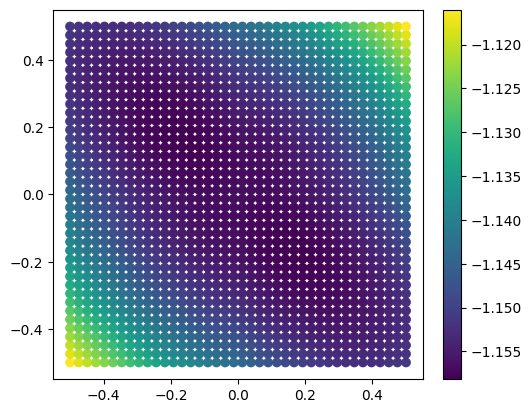

In [11]:
from quant_met.minimize_free_energy import free_energy

beta = 100

data = []

BZ_grid = utils.generate_uniform_grid(10, 10, all_K_points[1], all_K_points[5], origin=[0, 0])

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, coulomb_gr=2.5)

delta_list = utils.generate_uniform_grid(40, 40, np.array([0, 1]), np.array([1, 0]), origin=np.array([-0.5, -0.5]))

for delta in delta_list:
    data.append(free_energy(delta_vector=delta, beta=beta, hamiltonian=graphene_h, k_points=BZ_grid))

fig, ax = plt.subplots()

scatter = ax.scatter(*zip(*delta_list), c=data, cmap="viridis")
fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

ax.set_aspect("equal", adjustable="box")

In [11]:
from quant_met.minimize_free_energy import minimize_loop, free_energy

beta = 100

BZ_grid = utils.generate_uniform_grid(10, 10, all_K_points[1], all_K_points[5], origin=[0, 0])

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1.0, coulomb_gr=5)

solution = minimize_loop(beta=beta, hamiltonian=graphene_h, k_points=BZ_grid)

In [10]:
print(solution)

             message: Optimization terminated successfully.
             success: True
                 fun: 0.29819812896934744
                   x: [ 1.323e-07  2.794e-07]
                 nit: 52
                nfev: 1593
          population: [[ 1.323e-07  2.794e-07]
                       [ 3.018e-06  9.958e-07]
                       ...
                       [ 8.552e-07  2.502e-06]
                       [ 6.852e-07  2.408e-07]]
 population_energies: [ 2.982e-01  2.982e-01 ...  2.982e-01  2.982e-01]


In [6]:
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, coulomb_gr=2.5)

#print(graphene_h.hamiltonian_k_space(np.array([[1, 1], [0, 0]])))
print(free_energy(delta_vector=np.array([1, 1]), beta=beta, hamiltonian=graphene_h, k_points=np.array([[0, 0], [1, 1]])))

[[-3.         -1.          3.          5.        ]
 [-1.68644799  0.2876847   1.7123153   3.68644799]]
[8.48644799 8.48644799]
0.0


In [7]:
a = np.arange(8).reshape((2,2,2))
#a = np.array([[0, 1], [1, 2]])
print(a)
print(np.trace(a, axis1=-2, axis2=-1))

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
[ 3 11]


In [ ]:
print(free_energy())